In [1]:
# Import gensim (and related modules for word2vec)

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [2]:
# Model training

model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

/Users/ktakehara/.local/share/virtualenvs/spike-8oudB8BP/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


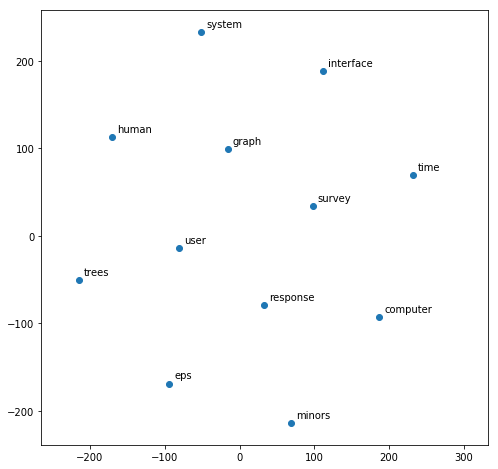

In [3]:
# Plotting by TSNE

def tsne_plot(labels, model):
    vectors = [model[l] for l in labels]
    #print(vectors)
    
    tsne = TSNE(n_components=2, random_state=0)
    XY = tsne.fit_transform(vectors)
    xs = XY[:, 0]
    ys = XY[:, 1]
    
    plt.figure(figsize=(8,8))
    plt.scatter(xs, ys)
    
    for l, x, y in zip(labels, xs, ys):
        plt.annotate(l, xy=(x,y), xytext=(5,5), textcoords='offset points')
        
    x_margin, y_margin = 100, 50
    plt.xlim(xs.min()-x_margin/2, xs.max()+x_margin)
    plt.ylim(ys.min()-y_margin/2, ys.max()+y_margin/2)

tsne_plot(model.wv.index2word, model)
    